## Automated Postprocessing for each run in a path

In [2]:
import sys
sys.path.append('../toolkit')
import Postprocessing
import os

c:\Users\bst3191\anaconda3\envs\geospatial_environment\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
def list_subfolders(general_path):
    return [name for name in os.listdir(general_path) if os.path.isdir(os.path.join(general_path, name)) ]

First set the path where all results are stored

In [3]:
#specify folder name:
#folder_name = "sensitivity_analysis_02_01_24"
#general_path = f'C:/Users/bst3191/OneDrive - Technische Universität Berlin/My Python projects/IDRIC Model(GitHub)/Casestudy_results/{folder_name}/'

folder_name = "No_collaboration"
general_path = f'../../Casestudy_results/{folder_name}/'
#general_path = f'C:/Users/bst3191/Documents/My Python projects/IDRIC Model(GitHub)/Casestudies/{folder_name}/'


#get all CaseNames
CaseNames = list_subfolders (general_path)

#specify name_run:
name_run = "snapshot100" #'snapshot100' #'snapshot100'
CaseNames

['GER_Buzzi Unicem SpA',
 'GER_CEMEX SAB de CV',
 'GER_CRH PLC',
 'GER_HeidelbergCement AG',
 'GER_Hugo Miebach GmbH',
 'GER_LafargeHolcim Ltd',
 'GER_Maerker Zement GmbH',
 'GER_Phoenix',
 'GER_Rohrdorfer Zementwerke',
 'GER_SCHWENK Zement KG',
 'GER_Solnhofer',
 'GER_Spenner GmbH Co KG',
 'GER_thomas Beteiligungen GmbH',
 'SP_PT_AG Cementos Balboa SA',
 'SP_PT_Cementos',
 'SP_PT_CEMEX SAB de CV',
 'SP_PT_Corporacion Masaveu SA',
 'SP_PT_CRH PLC',
 'SP_PT_HeidelbergCement AG',
 'SP_PT_InterCement Participacoes SA',
 'SP_PT_LafargeHolcim Ltd',
 'SP_PT_Secil',
 'SP_PT_Unknown',
 'SP_PT_Votorantim SA',
 'UK_Breedon Group PLC',
 'UK_CEMEX SAB de CV',
 'UK_CRH PLC',
 'UK_HeidelbergCement AG',
 'UK_LafargeHolcim Ltd',
 'UK_Mannok Build Ltd']

In [62]:
CaseNames = ['SP_PT_Secil']

Now run through each folder and perform the post processing for each run

SP_PT_Secil


c:\Users\bst3191\anaconda3\envs\geospatial_environment\lib\site-packages\geopandas\io\file.py:299: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\bst3191\Documents\My Python Projects\INDiECAR\COSTALLO\notebooks\../toolkit\Postprocessing.py:475: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



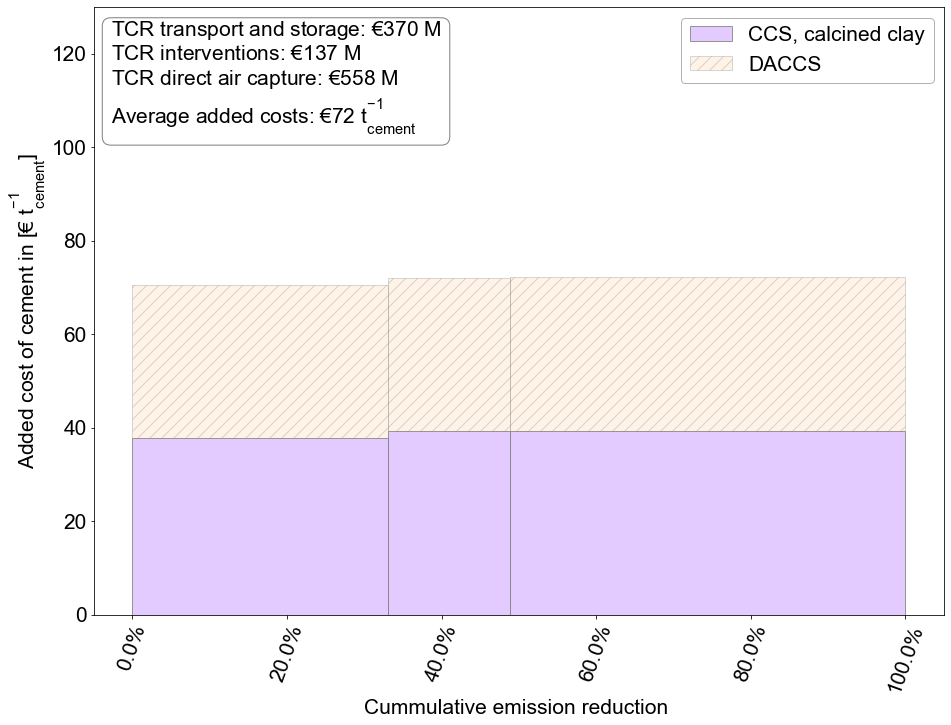

Postprocessing sucessfull for SP_PT_Secil


c:\Users\bst3191\anaconda3\envs\geospatial_environment\lib\site-packages\geopandas\io\file.py:299: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\bst3191\Documents\My Python Projects\INDiECAR\COSTALLO\notebooks\../toolkit\Postprocessing.py:1001: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.

c:\Users\bst3191\Documents\My Python Projects\INDiECAR\COSTALLO\notebooks\../toolkit\Postprocessing.py:1009: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



In [63]:
for CaseName in CaseNames:
    path  =  f'{general_path}{CaseName}'
    try:
        print(CaseName)
        Postprocessing.Run_postprocessing(path,name_run, CaseName)
        print(f"Postprocessing sucessfull for {CaseName}")
    except:
        print(f"ERROR: Postprocessing failed for {CaseName}")

Combining results: This little part of the script can be used to combine results of multiple runs in one excel or shapefile. 

In [4]:
combining = True
filter_name = "UK"

import pandas as pd
import geopandas as gpd
from pathlib import Path

def filter_list (lst,search_string):
    "this function filters a list and returns list only containing strings that contain search string"
    lst = list(filter(lambda k: search_string in k, lst))
    return lst

#get all CaseNames:
CaseNames = list_subfolders (general_path)

#filter CaseNames for one country:
CaseNames = filter_list(CaseNames, filter_name)


In [5]:
if combining:
    # Initialize an empty dataframe to append all the data
    all_data = pd.DataFrame()

    # Iterate through the case names
    for case in CaseNames:
        # Define the path to the CSV file
        csv_file = Path(f"../../Casestudy_results/{folder_name}/{case}/Technology/snapshot100/Results_postprocessing/Results_{case}_snapshot100.csv")
        
        # Check if the CSV file exists
        if csv_file.exists():
            # Read the CSV file into a pandas dataframe
            df = pd.read_csv(csv_file,delimiter=';')
            
            # Append the dataframe to the all_data dataframe
            all_data = all_data.append(df, ignore_index=True)
        else:
            print(f"File {csv_file} not found")

    # Load the base case CSV file
    df_base_case = pd.read_csv(f"../../Casestudy_results/Base_Cases/UK/Technology/snapshot100/Results_postprocessing/Results_UK_snapshot100.csv", delimiter=';')
    
    # Ensure the 'OID' column is of string type for both dataframes to match correctly
    all_data['OID'] = all_data['OID'].astype(str)
    df_base_case['OID'] = df_base_case['OID'].astype(str)

    # Create a dictionary from df_base_case for faster lookup
    base_case_dict = df_base_case.set_index('OID')['LCOP_total_w_nets'].to_dict()

    # Calculate the difference and add it to a new column in all_data
    all_data['diff_to_basecase'] = all_data.apply(lambda row: row['LCOP_total_w_nets'] - base_case_dict.get(row['OID'], 0), axis=1)

    #calculate extra costs in M€ per cement plant for not collaborating: 
    all_data['annual difference'] = all_data['diff_to_basecase'] * all_data['capacity']/1000000

    # Round the 'annual difference' column to one decimal place
    all_data['annual difference'] = all_data['annual difference'].round(1)

    # Convert the pandas dataframe to a GeoDataFrame
    # Note: This step assumes that your CSV file contains columns for geometry data such as 'latitude' and 'longitude'
    # If your CSV files do not contain geometry data, you'll need to adjust this part
    gdf = gpd.GeoDataFrame(all_data, geometry=gpd.points_from_xy(all_data.Longitude, all_data.Latitude))

    # Save the GeoDataFrame as a shapefile
    gdf.to_file(f"../../Casestudy_results/{folder_name}/Comparison_collaboration{filter_name}.shp")
    gdf.to_csv(f"../../Casestudy_results/{folder_name}/Comparison_collaboration{filter_name}.csv", sep=';', index=False) 
all_data

C:\Users\bst3191\AppData\Local\Temp\ipykernel_26612\1893236668.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
C:\Users\bst3191\AppData\Local\Temp\ipykernel_26612\1893236668.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
C:\Users\bst3191\AppData\Local\Temp\ipykernel_26612\1893236668.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df, ignore_index=True)
C:\Users\bst3191\AppData\Local\Temp\ipykernel_26612\1893236668.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(df,

,index,OID,Longitude,Latitude,parent_name,route_CO2,PIP_IDs,dist_km,process_tech,grid,...,LCOP_CO2_avoided,LCOP_total_w_nets,LCOP_CO2_avoided_w_NETs,Cummulative_CO2_avoided,Cummulative_CO2_avoided_w_nets,Width_CO2_avoided_w_nets,xticks,diff_to_basecase,annual difference,geometry
0,0,CID53,-1.751755,53.337916,Breedon Group PLC,LINESTRING (-1.751754988790997 53.337916006373...,"['PIPEID0', 'PIPEID1']",148.036921,CCS_CALCINED_CLAY_CEMENT,1,...,74.426368,81.063751,130.687094,0.494644,0.682483,0.682483,0.341242,10.197629,11.3,POINT (-1.75175 53.33792)
1,1,CID71,-7.143371,53.432118,Breedon Group PLC,NaN,NaN,NaN,CALCINED_CLAY_BIOMASS_CEMENT,2,...,76.522479,86.134028,154.435510,0.702198,1.000000,0.317517,0.841242,7.795238,4.0,POINT (-7.14337 53.43212)
2,0,CID58,-0.529654,53.675822,CEMEX SAB de CV,LINESTRING (-0.5296539893112743 53.67582200595...,"['PIPEID0', 'PIPEID2']",111.835430,CCS_CALCINED_CLAY_CEMENT,1,...,69.993475,76.538721,123.392058,0.203134,0.278981,0.278981,0.139491,0.187661,0.1,POINT (-0.52965 53.67582)
3,1,CID59,-1.286254,52.377293,CEMEX SAB de CV,LINESTRING (-1.286253988876013 52.377293006710...,"['PIPEID1', 'PIPEID0', 'PIPEID2']",266.610352,CCS_CALCINED_CLAY_CEMENT,2,...,80.974186,83.967305,135.368065,0.725477,1.000000,0.721019,0.639491,11.998343,15.9,POINT (-1.28625 52.37729)
4,1,CID55,-1.851891,53.265267,CRH PLC,LINESTRING (-1.851890988743173 53.265267006429...,"['PIPEID0', 'PIPEID4']",140.265996,CCS_CALCINED_CLAY_CEMENT,2,...,71.066812,78.951998,127.282628,0.118931,0.164824,0.164824,0.082412,8.478753,6.2,POINT (-1.85189 53.26527)
5,4,CID73,-6.387712,53.684307,CRH PLC,LINESTRING (-6.387711986882004 53.684307007319...,"['PIPEID3', 'PIPEID4']",287.177607,CCS_CALCINED_CLAY_CEMENT,5,...,72.470601,79.409485,128.020165,0.451937,0.624786,0.459962,0.394805,4.240928,8.8,POINT (-6.38771 53.68431)
6,0,CID54,-3.392125,51.397546,CRH PLC,NaN,NaN,NaN,CALCINED_CLAY_CEMENT,1,...,33.422406,84.194840,254.588434,0.483641,0.705134,0.080348,0.664960,5.467250,2.0,POINT (-3.39213 51.39755)
7,3,CID72,-8.688373,52.641364,CRH PLC,NaN,NaN,NaN,CALCINED_CLAY_BIOMASS_CEMENT,4,...,74.136568,84.635956,151.749515,0.569190,0.836440,0.131306,0.770787,0.988326,0.6,POINT (-8.68837 52.64136)
8,2,CID56,-2.471920,55.979125,CRH PLC,LINESTRING (-2.471919988719641 55.979125005375...,"['PIPEID2', 'PIPEID4']",373.235065,CCS_CALCINED_CLAY_CEMENT,3,...,83.259473,85.567983,137.948601,0.688121,1.000000,0.163560,0.918220,4.646073,3.4,POINT (-2.47192 55.97913)
9,1,CID62,-3.061635,53.152678,HeidelbergCement AG,LINESTRING (-3.061634988237042 53.152678006760...,"['PIPEID1', 'PIPEID3']",62.649968,CCS_CALCINED_CLAY_CEMENT,2,...,66.763106,76.029916,122.571786,0.151072,0.209055,0.209055,0.104528,3.208679,2.2,POINT (-3.06163 53.15268)
